In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as peaks
from scipy.optimize import curve_fit 

In [2]:
data = np.loadtxt("calib_Values.csv", skiprows = 1, delimiter = ",")

In [3]:
I = data[:,1 ]

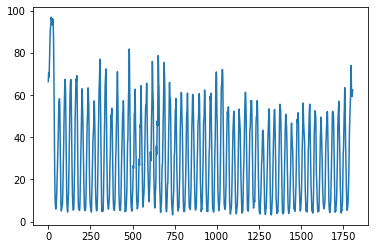

In [4]:
plt.plot(I)

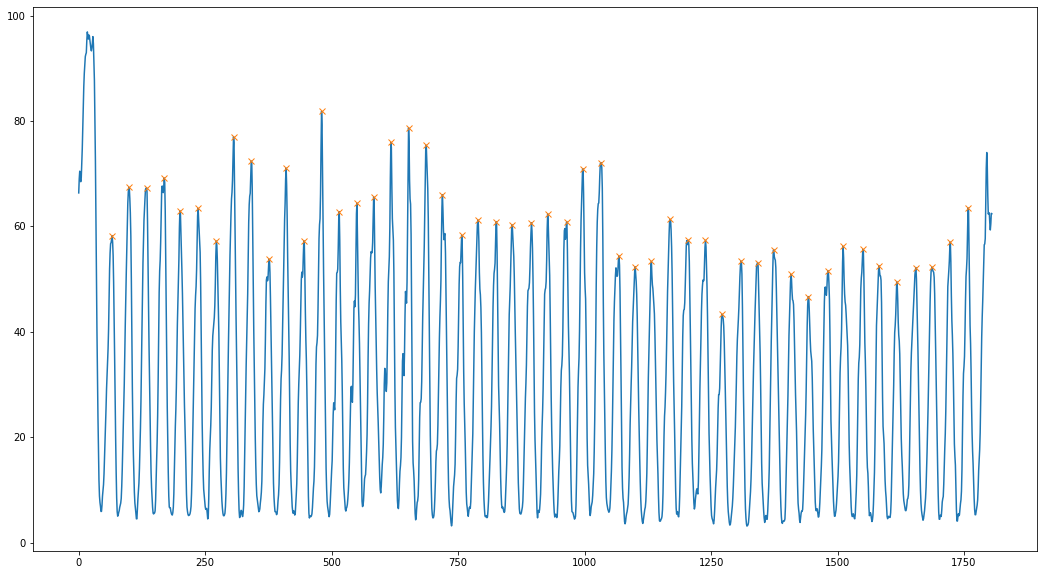

In [8]:
plt.figure(figsize = (10*1.8, 10))
plt.plot(I)
i = peaks(I, distance = 20)[0]
i = i[1:-1]
plt.plot(i, I[i], "x")

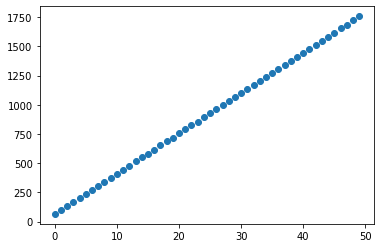

In [9]:
x = np.arange(len(i))
plt.plot(x, i, "o")


In [10]:
fun = lambda z, a, b: b + a*z

In [11]:
popt, pcov = curve_fit(fun, x, i)

In [12]:
popt

array([34.50881152, 65.01411764])

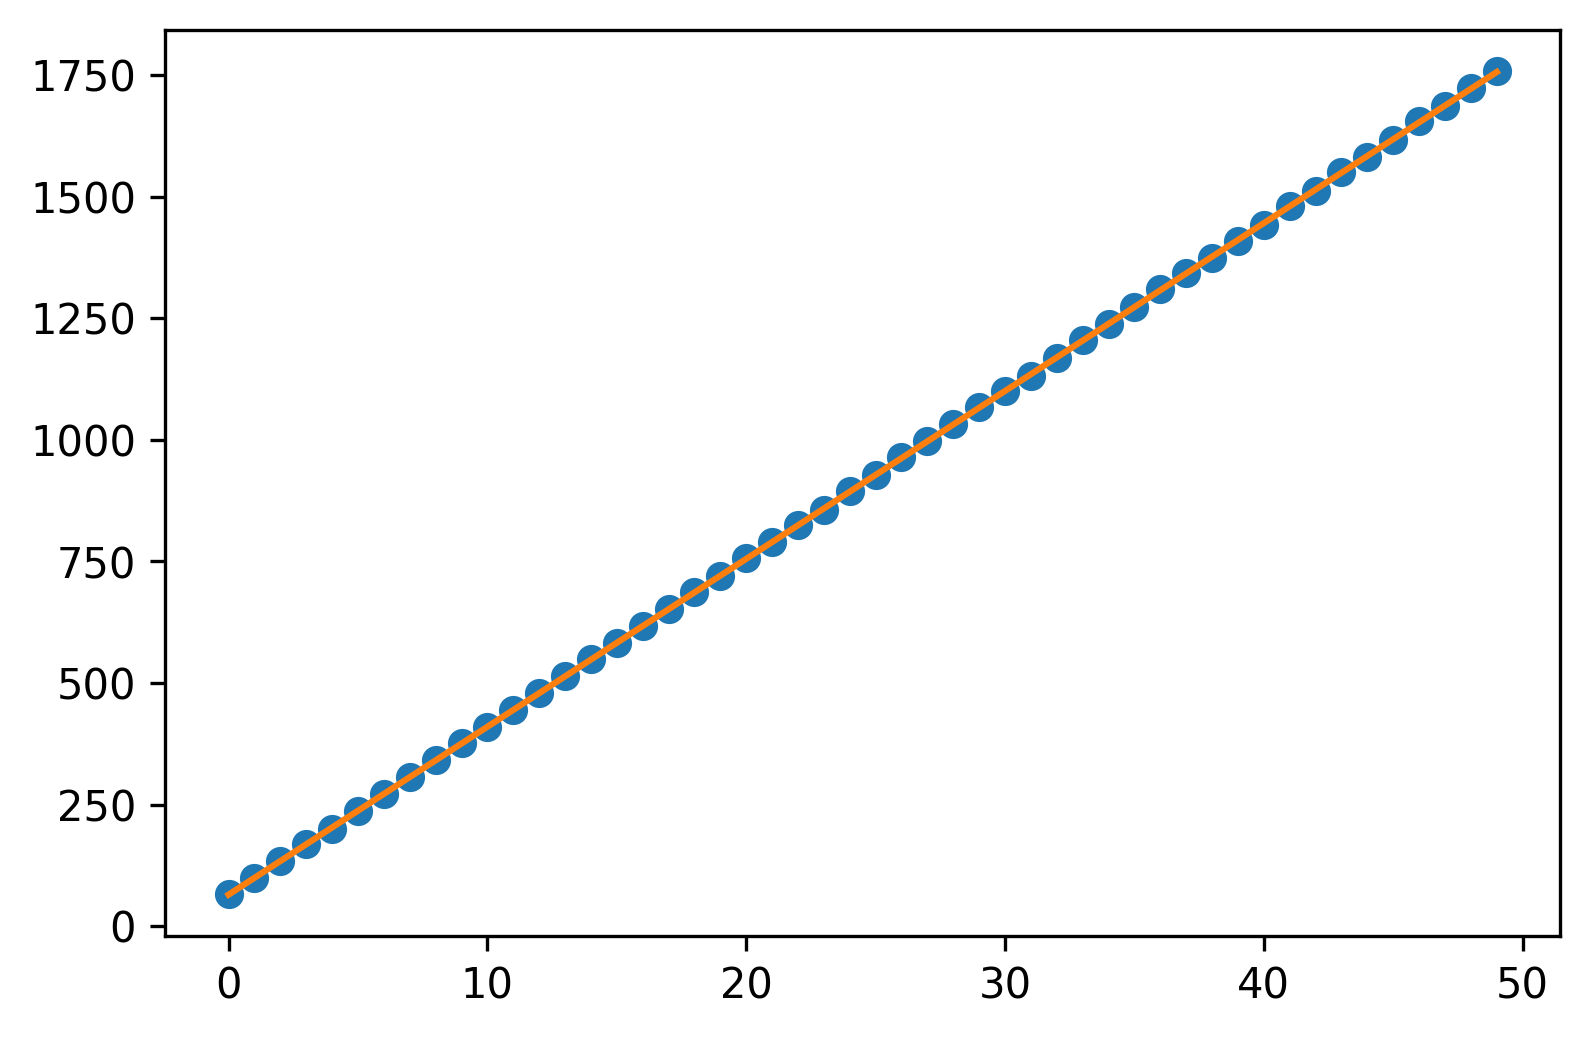

In [13]:
plt.figure(dpi=300)
plt.plot(x, i, "o")
plt.plot(x, fun(x, *popt))

In [14]:
slope = popt[0]

In [15]:
calib = 2 / slope  
calib

0.05795621209841907

In [16]:
err_relative = (0.0586 - (calib)) / (0.0586)
err_relative

0.010986141665203546

In [17]:
err_relative = (0.1 - (calib)) / (0.1)
err_relative

0.4204378790158093